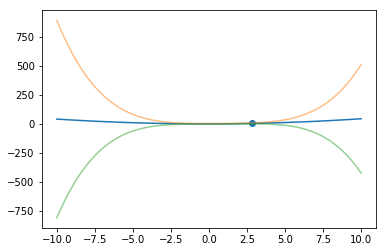

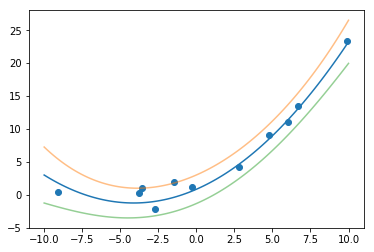

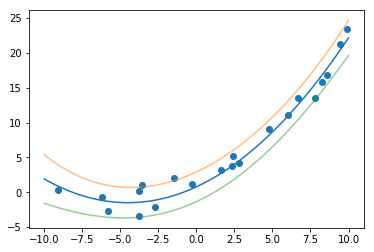

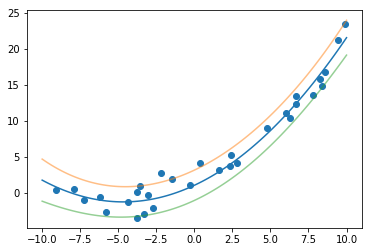

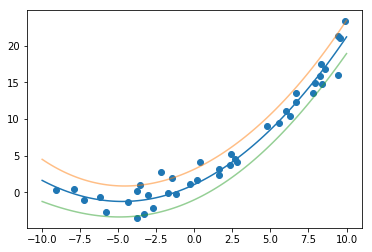

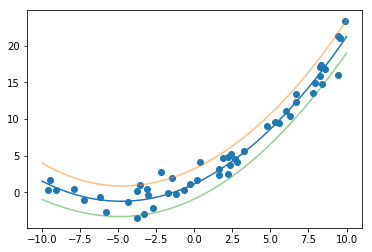

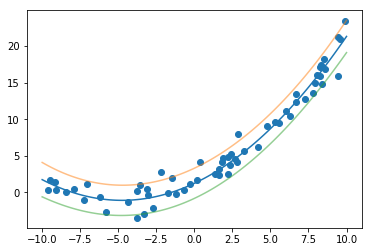

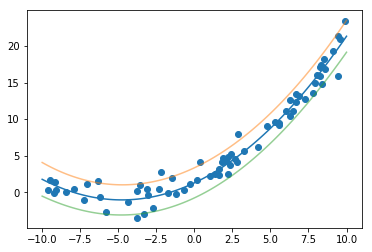

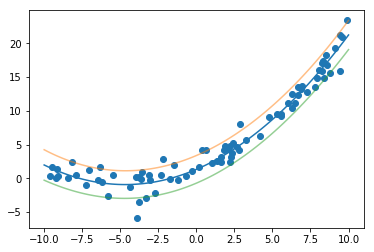

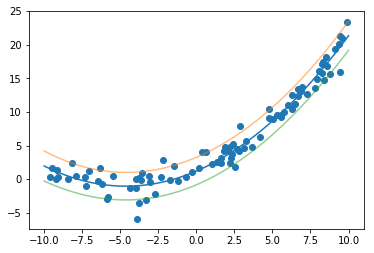

[[1.5]
 [1. ]
 [0.1]]
----
[[1.16743995]
 [0.98136861]
 [0.10477681]]
[[ 4.15509698e-02 -4.94875380e-05 -6.91845574e-04]
 [-4.94875380e-05  6.06870900e-04 -1.69291598e-05]
 [-6.91845574e-04 -1.69291598e-05  2.16619955e-05]]


In [42]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
def x2phi(x, num_basis):
    phi = np.array([[x**d for d in range(num_basis)]]).reshape(num_basis,1)
    return phi

#############
##   MAP   ##
#############

# Ground Truth  y = 0.5x
w_gt = [1.5, 1.0, 0.1]
num_basis = len(w_gt)
w_gt = np.array(w_gt, ndmin=2).reshape(num_basis, 1)
data_var = 2
# print(w_gt)
# print("\n\n")




# prior 
a = 0.5             # a: guess 1/var of y
b = 3              # b: guess 1/var of weight
mu_prior = np.array( [[0.0 for x in range(num_basis)] ] ).T
lambda_prior = np.identity(num_basis) * b

mu_history = []
var_history = []

points_xs = []
points_ys = []
for i in range(100):
    
    
    # data 
    x = np.asscalar(np.random.uniform(-10,10,1))
#     print(x)
    points_xs.append(x)
    phi = x2phi(x, num_basis)
#     print(phi)
    y = np.matmul(w_gt.T, phi) + np.asscalar(np.random.normal(0, data_var**(1/2), 1))
    points_ys.append(y)

    
    # posterior
#     print(np.matmul(phi, phi.T))
    lambda_posterior = a * np.matmul(phi, phi.T) + lambda_prior
    mu_posterior = np.matmul(inv(lambda_posterior),  a*np.matmul(phi, y) + np.matmul(lambda_prior, mu_prior))

    # update prior
    mu_prior = mu_posterior
    lambda_prior = lambda_posterior
    
    
    
    if i % 10 == 0:
        plot_pred(mu_posterior, phi, a, lambda_posterior)
    
#     print()
    
# print("Posterior")
print(w_gt)
print('----')
print(mu_posterior)
print(inv(lambda_posterior))

In [31]:
##################################
##   Predictive Distribution    ##
##################################
def pred_distribution(mu, phi, a, lambda_):
    mu_pred  = np.matmul(mu.T, phi)
    var_pred = (1/a) + np.matmul(np.matmul(phi.T, inv(lambda_)), phi)
    return np.asscalar(mu_pred), np.asscalar(var_pred)


def plot_pred(mu_posterior, phi, a, lambda_posterior):

    mu_pred, var_pred = pred_distribution(mu_posterior, phi, a, lambda_posterior)
    xs = np.linspace(-10, 10, 100)
    ys_mu = []
    ys_std_up = []
    ys_std_down = []
    for x in xs:
        phi = x2phi(x, num_basis)
        mu_pred, var_pred = pred_distribution(mu_posterior, phi, a, lambda_posterior)
        ys_mu.append(mu_pred)
        ys_std_up.append(mu_pred+var_pred)
        ys_std_down.append(mu_pred-var_pred)
    plt.scatter(points_xs, points_ys)
    plt.plot(xs, ys_mu)
    plt.plot(xs, ys_std_up, alpha=0.5)
    plt.plot(xs, ys_std_down, alpha=0.5)
    plt.show()